In [1]:
import os

os.environ["KERAS_BACKEND"] = "jax"

import numpy as np
import pandas as pd

from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras import metrics
import matplotlib.pyplot as plt
import seaborn as sns

from utils import CustomEvalDataset

plt.style.use("seaborn-v0_8-notebook")
plt.style.use("petroff10")

<Axes: >

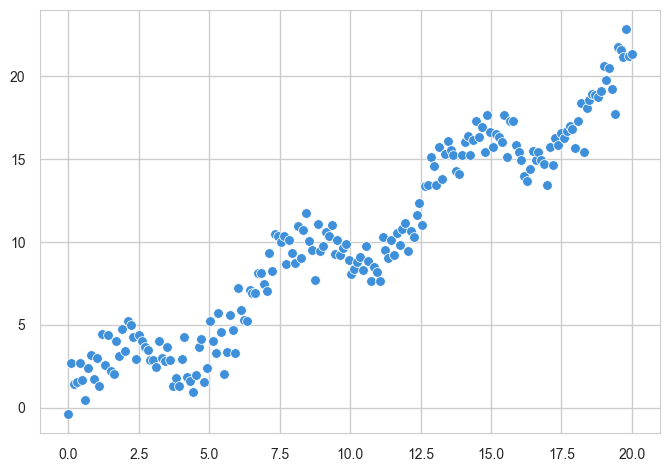

In [2]:
# Crate a 1-dimensional input
X = np.linspace(0, 20, num=200).reshape(-1, 1)
# create an output
y = (X + np.sin(X) * 2 + np.random.normal(size=X.shape)).reshape(-1, 1)
sns.scatterplot(x=X.ravel(), y=y.ravel())

In [3]:
in_features = 1
out_features = 1
model = models.Sequential(
    [layers.Input(shape=(in_features,)), layers.Dense(out_features)]
)
model.compile(
    optimizer=optimizers.SGD(learning_rate=1e-3), loss=losses.MeanSquaredError()
)
model.fit(X, y, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 263.6441
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 28.1975
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 5.0637
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 2.9396
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 2.9436
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 2.9241
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 2.9060
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 2.8921
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 3.1400
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 2.9087
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 2.7350
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 3.0253
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 2.9649
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 2.9329
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 2.8367
Epoch 16/20
4/4 ━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


<Axes: >

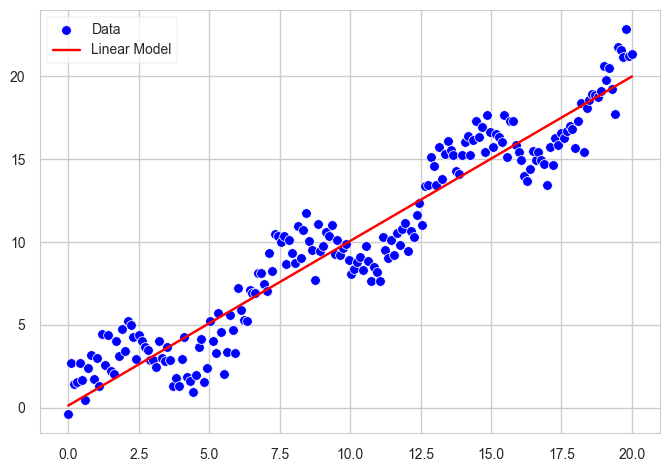

In [4]:
y_pred = model.predict(X)
sns.scatterplot(x=X.ravel(), y=y.ravel(), color="blue", label="Data")  # The data
sns.lineplot(
    x=X.ravel(), y=y_pred.ravel(), color="red", label="Linear Model"
)  # What our model learned

In [5]:
model = models.Sequential([layers.Input(shape=(1,)), layers.Dense(10), layers.Dense(1)])
model.compile(
    optimizer=optimizers.SGD(learning_rate=1e-3), loss=losses.MeanSquaredError()
)
model.fit(X, y, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 49.2919
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 3.0904
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 2.8446
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 3.3937
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 3.0881
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 3.5566
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 2.8805
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 3.2657
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 3.1315
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 3.1308
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 2.9671
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 3.0445
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 3.0075
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 2.8944
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 2.9079
Epoch 16/20
4/4 ━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


<Axes: >

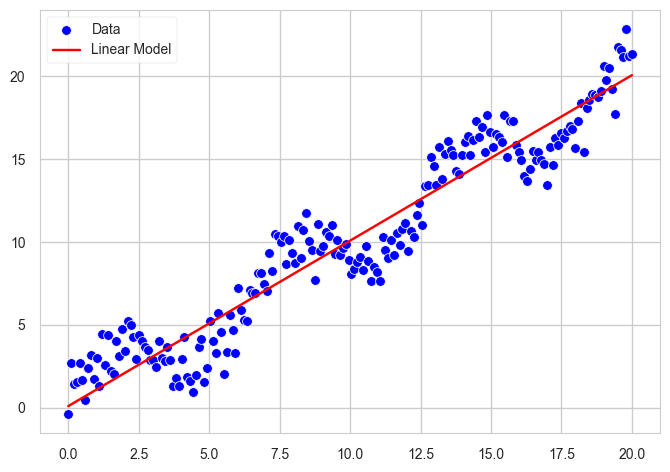

In [6]:
y_pred = model.predict(X)
sns.scatterplot(x=X.ravel(), y=y.ravel(), color="blue", label="Data")  # The data
sns.lineplot(
    x=X.ravel(), y=y_pred.ravel(), color="red", label="Linear Model"
)  # What our model learned

Text(0, 0.5, 'Activation')

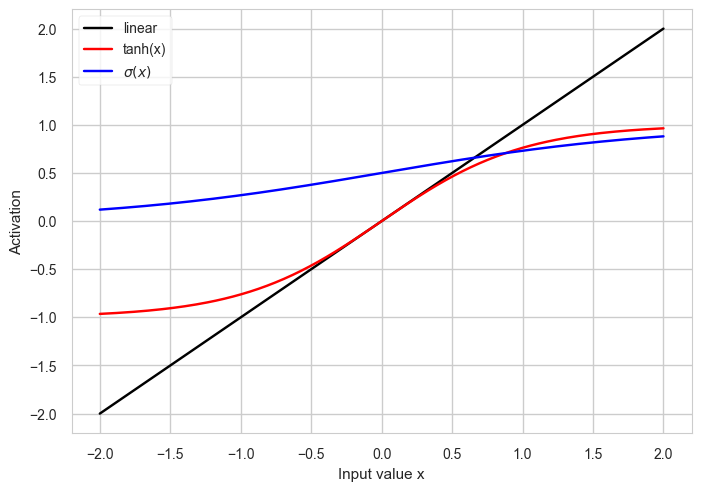

In [7]:
activation_input = np.linspace(-2, 2, num=200)
tanh_activation = np.tanh(activation_input)
sigmoid_activation = np.exp(activation_input) / (np.exp(activation_input) + 1)
sns.lineplot(x=activation_input, y=activation_input, color="black", label="linear")
sns.lineplot(x=activation_input, y=tanh_activation, color="red", label="tanh(x)")
ax = sns.lineplot(
    x=activation_input, y=sigmoid_activation, color="blue", label="$\\sigma(x)$"
)
ax.set_xlabel("Input value x")
ax.set_ylabel("Activation")

In [8]:
model = models.Sequential(
    [layers.Input(shape=(1,)), layers.Dense(10, activation="tanh"), layers.Dense(1)]
)
model.compile(optimizer=optimizers.AdamW(1e-1), loss=losses.MeanSquaredError())
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(X, y, epochs=500)

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 96.4538
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 29.6020
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 12.7816
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 8.8543
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 5.9194
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 4.3539
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 3.6667
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 3.2389
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 3.4292
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 4.0630
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 9.1089
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 4.2852
Epoch 13/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 4.8864
Epoch 14/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 3.9525
Epoch 15/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 3.6030
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


<Axes: >

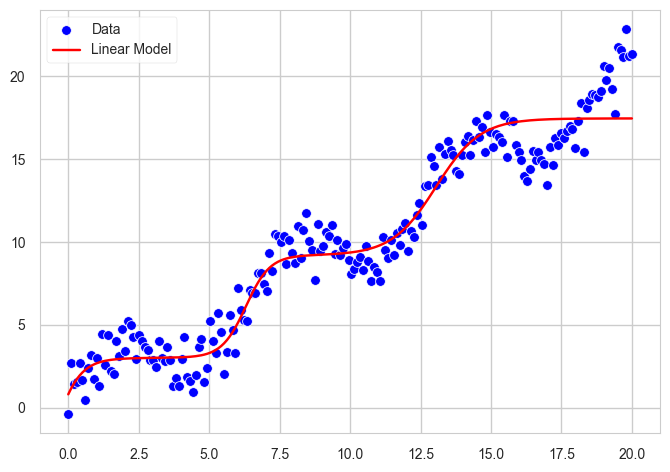

In [10]:
y_pred = model.predict(X)
sns.scatterplot(x=X.ravel(), y=y.ravel(), color="blue", label="Data")  # The data
sns.lineplot(
    x=X.ravel(), y=y_pred.ravel(), color="red", label="Linear Model"
)  # What our model learned

<Axes: >

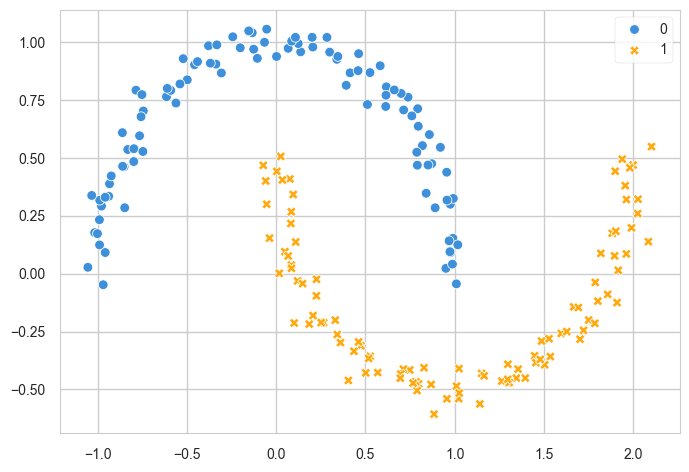

In [11]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y)

In [12]:
print(X.shape, y.shape)

(200, 2) (200,)


In [13]:
model = models.Sequential(
    [layers.Input(shape=(2,)), layers.Dense(2, activation="softmax")]
)
model.compile(
    optimizer=optimizers.SGD(learning_rate=1e-1),
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
)

model.fit(X, y.reshape(-1, 1), epochs=50, verbose=0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


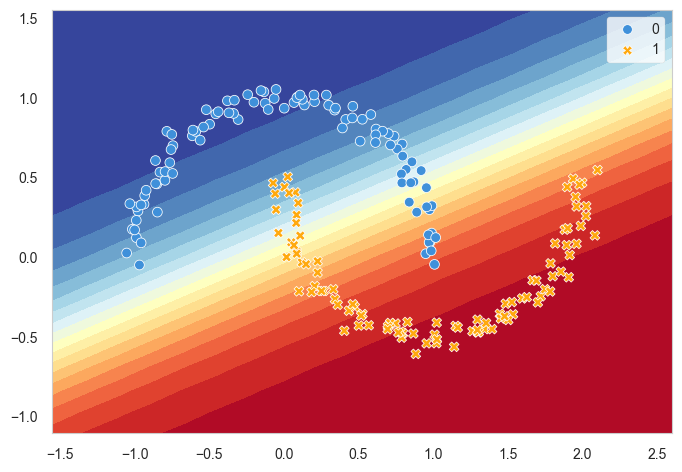

In [14]:
def visualize2DSoftmax(X, y, model, title=None):
    x_min = np.min(X[:, 0]) - 0.5
    x_max = np.max(X[:, 0]) + 0.5
    y_min = np.min(X[:, 1]) - 0.5
    y_max = np.max(X[:, 1]) + 0.5
    xv, yv = np.meshgrid(
        np.linspace(x_min, x_max, num=20),
        np.linspace(y_min, y_max, num=20),
        indexing="ij",
    )
    xy_v = np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1)))
    y_hat = model.predict(xy_v)
    # with torch.no_grad():
    #     logits = model(torch.tensor(xy_v, dtype=torch.float32))
    #     y_hat = F.softmax(logits, dim=1).numpy()

    cs = plt.contourf(
        xv,
        yv,
        y_hat[:, 0].reshape(20, 20),
        levels=np.linspace(0, 1, num=20),
        cmap=plt.cm.RdYlBu,
    )
    ax = plt.gca()
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, ax=ax)
    if title is not None:
        ax.set_title(title)


visualize2DSoftmax(X, y, model)

In [15]:
model = models.Sequential(
    [
        layers.Input(shape=(2,)),
        layers.Dense(30, activation="tanh"),
        layers.Dense(30, activation="tanh"),
        layers.Dense(2, activation="softmax"),
    ]
)
model.compile(
    optimizer=optimizers.SGD(learning_rate=1e-1),
    loss=losses.SparseCategoricalCrossentropy(),
)

model.fit(X, y.reshape(-1, 1), epochs=200, verbose=0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


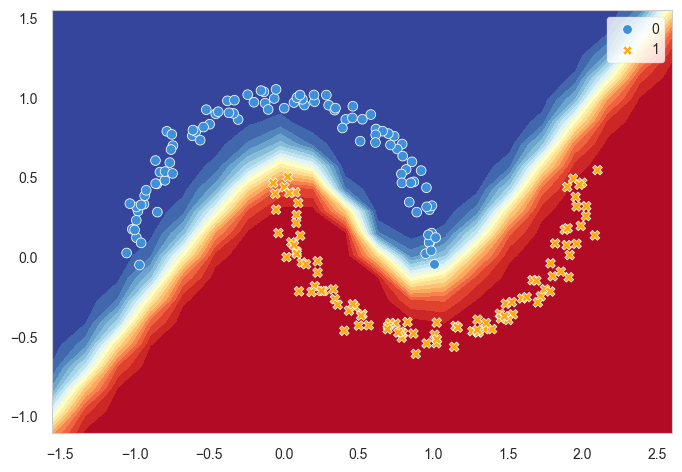

In [16]:
visualize2DSoftmax(X, y, model)

In [17]:
X_train, y_train = make_moons(n_samples=8000, noise=0.4)
X_test, y_test = make_moons(n_samples=200, noise=0.4)

<Axes: >

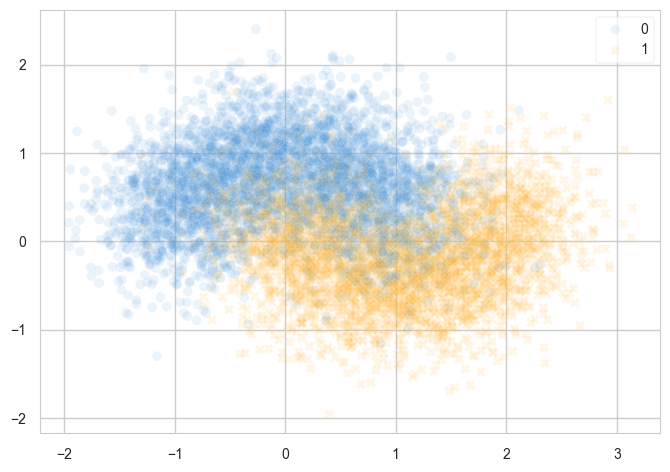

In [18]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, style=y_train, alpha=0.1)

In [19]:
model_new = models.Sequential(
    [
        layers.Input(shape=(2,)),
        layers.Dense(30, activation="tanh"),
        layers.Dense(30, activation="tanh"),
        layers.Dense(2, activation="softmax"),
    ]
)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


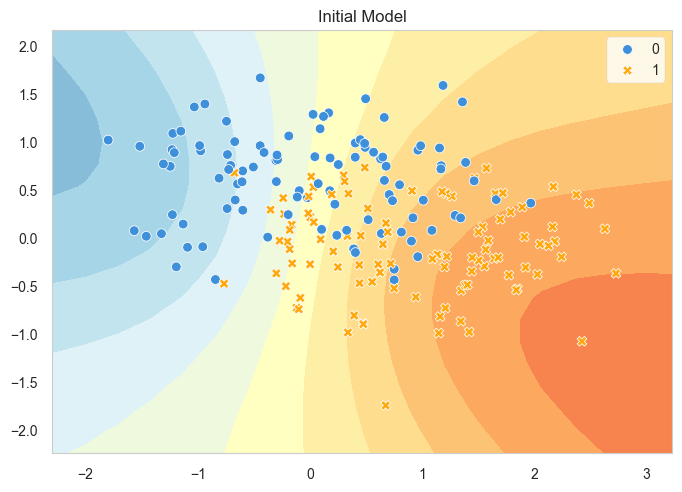

In [20]:
visualize2DSoftmax(X_test, y_test, model_new, title="Initial Model")

In [21]:
model_new.compile(
    optimizer=optimizers.SGD(learning_rate=1e-3),
    metrics=[metrics.SparseCategoricalAccuracy()],
    loss=losses.SparseCategoricalCrossentropy(from_logits=False),
)

callback_predict_test = CustomEvalDataset(X_test, y_test)
history = model_new.fit(
    X_train,
    y_train.reshape(-1, 1),
    callbacks=[callback_predict_test],
    epochs=10,
    verbose=0,
)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


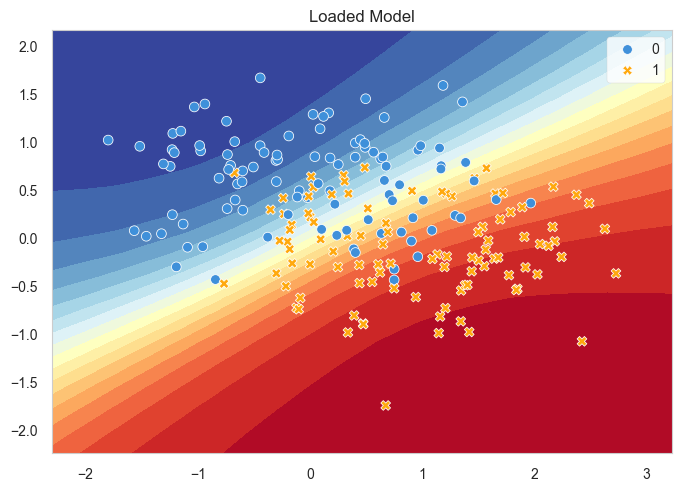

In [22]:
visualize2DSoftmax(X_test, y_test, model_new, title="Loaded Model")

<Axes: >

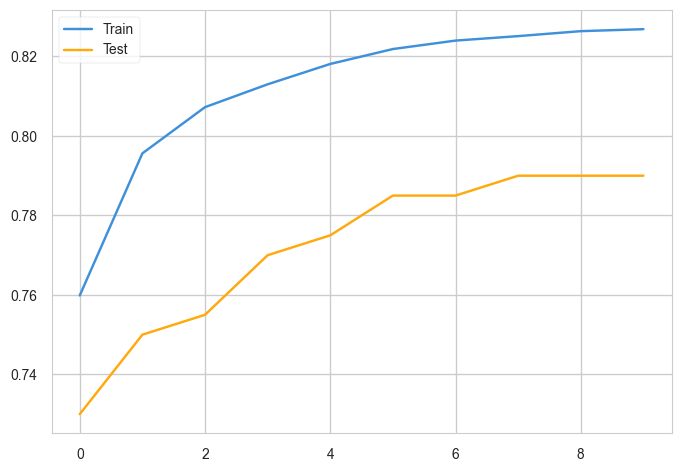

In [23]:
pd.DataFrame(
    {
        "Train": history.history["sparse_categorical_accuracy"],
        "Test": callback_predict_test.list_metrics,
    }
).plot()